In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
accounts_data = pd.read_csv('Accounts.csv')
transactions_data = pd.read_csv('Transactions.csv')

In [ ]:
transactions_data['TransactionDate'] = pd.to_datetime(transactions_data['TransactionDate'])
current_date = datetime(2025, 5, 21, 19, 10)

In [ ]:
latest_transactions = transactions_data.groupby('AccountID')['TransactionDate'].max().reset_index()
latest_transactions['DaysSinceLastTransaction'] = (current_date - latest_transactions['TransactionDate']).dt.days

In [ ]:
merged_data = accounts_data.merge(latest_transactions, on='AccountID', how='left')

In [ ]:
merged_data['DaysSinceLastTransaction'] = merged_data['DaysSinceLastTransaction'].fillna((current_date - pd.to_datetime(accounts_data['CreatedDate'])).max().days)

In [ ]:
high_value_threshold = 78906  # 75th percentile of Balance
inactive_threshold = 180  # 6 months

In [ ]:
# Filter for dormant high-value accounts
inactive_high_value_accounts = merged_data[
    (merged_data['Balance'] > high_value_threshold) &
    (merged_data['DaysSinceLastTransaction'] > inactive_threshold)]

In [ ]:
alerts_list = []

In [ ]:
# Generate alerts and store them in the list
for index, row in inactive_high_value_accounts.iterrows():
    alert_message = f"Alert: Account {row['AccountID']} with balance {row['Balance']} EGP is dormant (last transaction {row['DaysSinceLastTransaction']} days ago). Please review."
    alerts_list.append({
        'AccountID': row['AccountID'],
        'Balance': row['Balance'],
        'DaysSinceLastTransaction': row['DaysSinceLastTransaction'],
        'AlertMessage': alert_message
    })
    print(alert_message)

Alert: Account 8 with balance 88990 EGP is dormant (last transaction 297.0 days ago). Please review.
Alert: Account 9 with balance 93376 EGP is dormant (last transaction 469.0 days ago). Please review.
Alert: Account 46 with balance 82846 EGP is dormant (last transaction 420.0 days ago). Please review.
Alert: Account 47 with balance 93773 EGP is dormant (last transaction 289.0 days ago). Please review.
Alert: Account 77 with balance 93285 EGP is dormant (last transaction 270.0 days ago). Please review.
Alert: Account 96 with balance 80519 EGP is dormant (last transaction 216.0 days ago). Please review.
Alert: Account 99 with balance 84298 EGP is dormant (last transaction 252.0 days ago). Please review.
Alert: Account 103 with balance 81091 EGP is dormant (last transaction 273.0 days ago). Please review.
Alert: Account 104 with balance 85494 EGP is dormant (last transaction 211.0 days ago). Please review.
Alert: Account 129 with balance 88826 EGP is dormant (last transaction 218.0 days 

In [ ]:
alerts_df = pd.DataFrame(alerts_list)

In [ ]:
alerts_df.to_excel('dormant_high_value_alerts.xlsx', index=False)
print("Alerts have been saved to 'dormant_high_value_alerts.xlsx'.")

Alerts have been saved to 'dormant_high_value_alerts.xlsx'.


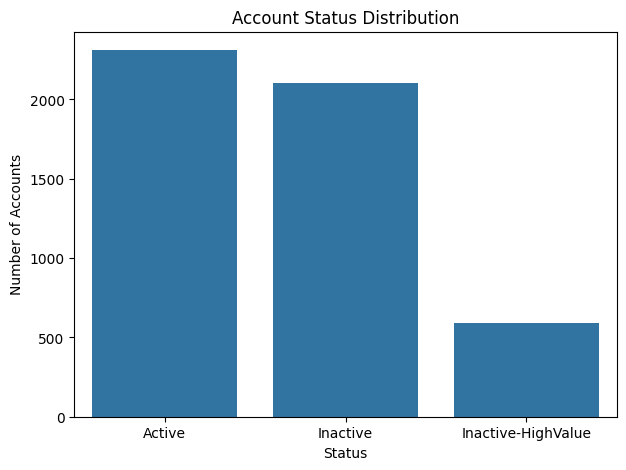

In [ ]:
merged_data['Status'] = 'Active'
merged_data.loc[merged_data['DaysSinceLastTransaction'] > inactive_threshold, 'Status'] = 'Inactive'
merged_data.loc[(merged_data['Balance'] > high_value_threshold) & (merged_data['DaysSinceLastTransaction'] > inactive_threshold), 'Status'] = 'Inactive-HighValue'

status_counts = merged_data['Status'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Account Status Distribution')
plt.ylabel('Number of Accounts')
plt.xlabel('Status')
plt.show()


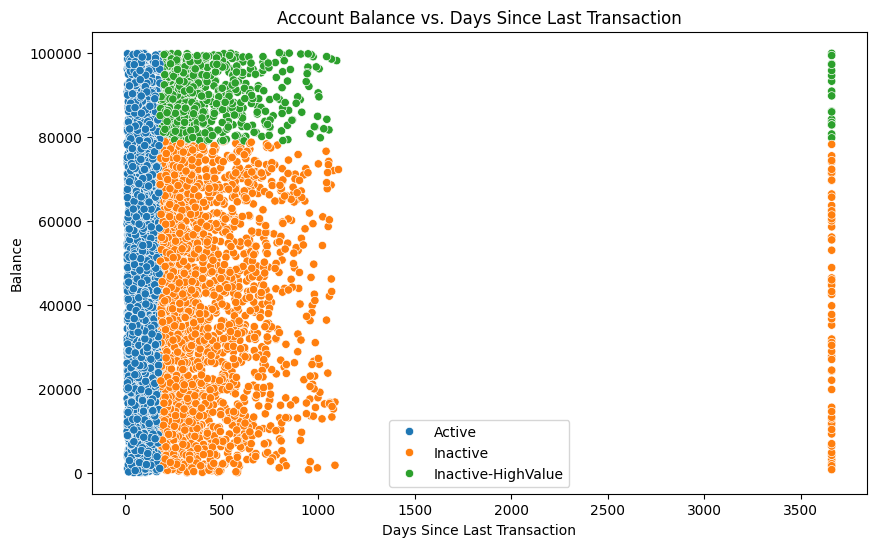

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='DaysSinceLastTransaction', y='Balance', hue='Status')
plt.title('Account Balance vs. Days Since Last Transaction')
plt.xlabel('Days Since Last Transaction')
plt.ylabel('Balance')
plt.legend()
plt.show()

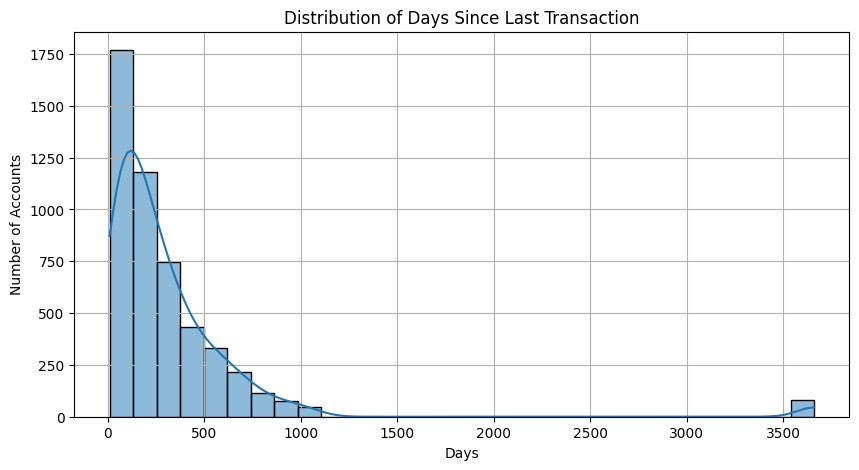

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 5))
sns.histplot(merged_data['DaysSinceLastTransaction'], bins=30, kde=True)
plt.title('Distribution of Days Since Last Transaction')
plt.xlabel('Days')
plt.ylabel('Number of Accounts')
plt.grid(True)
plt.show()